## Example Trees in Python<br>
<br>

**0) Loading Libraries**<br>
<br>

In [1]:
#standard libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#pip install BioPython if necessary
from scipy import spatial            #for turning matrices into square forms
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio import Phylo                #for constructing a pylogenetic tree

In [5]:
from ReadMyFasta import ReadMyFasta  #a subroutine that reads the data (actually just text files, but called "fasta" in the lifescience community)    

In [7]:
import warnings
warnings.filterwarnings('ignore')    #we also want to ignore some irrelevant warnings

<br>

**1) Loading and Inspecting the Data**<br>
<br>

In [9]:
[N, S, ToAlign] = ReadMyFasta('cytochromeC.txt') #loading the data

In [11]:
print(N) #list of samples

                 0
0              cow
7            mouse
14           human
21  red bread mold
28         euglena
34         chicken
40             ant
47        mole rat
53          salmon
59           cobra
74          rhesus
81           chimp


In [13]:
print(S) #the sequences themself (here AA sequence)

['MAAAAATLRGAMVGPRGAGLPGARARGLLCGARPGQLPLRTPQAVSLSSKSGLSRGRKVILSALGMLAAGGAGLAVALHSAVSASDLELHPPSYPWSHRGLLSSLDHTSIRRGFQVYKQVCSSCHSMDYVAYRHLVGVCYTEDEAKALAEEVEVQDGPNEDGEMFMRPGKLSDYFPKPYPNPEAARAANNGALPPDLSYIVRARHGGEDYVFSLLTGYCEPPTGVSLREGLYFNPYFPGQAIGMAPPIYNEVLEFDDGTPATMSQVAKDVCTFLRWAAEPEHDHRKRMGLKMLLMMGLLLPLVYAMKRHKWSVLKSRKLAYRPPK', 'MAAAAASLRRTVLGPRGVGLPGASAPGLLGGARSRQLPLRTPQAVSLSSKSGPSRGRKVMLSALGMLAAGGAGLAVALHSAVSASDLELHPPSYPWSHRGLLSSLDHTSIRRGFQVYKQVCSSCHSMDYVAYRHLVGVCYTEEEAKALAEEVEVQDGPNDDGEMFMRPGKLSDYFPKPYPNPEAARAANNGALPPDLSYIVRARHGGEDYVFSLLTGYCEPPTGVSLREGLYFNPYFPGQAIGMAPPIYTEVLEYDDGTPATMSQVAKDVATFLRWASEPEHDHRKRMGLKMLLMMGLLLPLTYAMKRHKWSVLKSRKLAYRPPK', 'MAAAAASLRGVVLGPRGAGLPGARARGLLCSARPGQLPLRTPQAVALSSKSGLSRGRKVMLSALGMLAAGGAGLAMALHSAVSASDLELHPPSYPWSHRGLLSSLDHTSIRRGFQVYKQVCASCHSMDFVAYRHLVGVCYTEDEAKELAAEVEVQDGPNEDGEMFMRPGKLFDYFPKPYPNSEAARAANNGALPPDLSYIVRARHGGEDYVFSLLTGYCEPPTGVSLREGLYFNPYFPGQAIAMAPPIYTDVLEFDDGTPATMSQIAKDVCTFLRWASEPEHDHRKRMGLKMLMMMALLVPLVYTIKRHKWSVLKSRKLAYRPPK', 'MLARTCLRSTR

In [15]:
print(ToAlign) #an object needed by BioPy. It essentially contains the same information as N and S

Alignment with 12 rows and 820 columns
MAAAAATLRGAMVGPRGAGLPGARARGLLCGARPGQLPLRTPQA...... cow
MAAAAASLRRTVLGPRGVGLPGASAPGLLGGARSRQLPLRTPQA...... mouse
MAAAAASLRGVVLGPRGAGLPGARARGLLCSARPGQLPLRTPQA...... human
MLARTCLRSTRTFASAKNGAFKFAKRSASTQSSGAAAESPLRLN...... red
GVDSHPPALPWPHFQWFQGLDWRSVRRGKEVYEQVFAPCHSLSF...... euglena
GELELHPPAFPWSHGGPLSALDHSSVRRGFQVYKQVCSACHSMD...... chicken
MAATLGRICKSGLLRPNYGTLIGQTSNFSTVKDWPRGRKVLLTC...... ant
MLSALGILAAGGAGLAVALHSAVSASDLELHPPNYPWSHRGLFS...... mole
MAALRVVVLSGTGRALLCTPKTIKAPRVNMSFASLPRSKKVALT...... salmon
MEAWLEAYHDVNVTETHSSGTFGRAGAIQAAISLELSSDVITSF...RRD cobra
VVLGPRGAGLPGARARGLLCSARPGQLPLRTPQAVALSSKSGLS...... rhesus
MAAAAASLRGVVLGPRGAGLPGARARGLLCSARPGQLPLRTPQA...... chimp


<br>

You might also want to explore the other datasets: 

In [ ]:
#[N, S, ToAlign] = ReadMyFasta('c-myc_AA.txt') #another AA sequence
#[N, S, ToAlign] = ReadMyFasta('pax8gene.txt') #DNA (= NT) sequence 

<br>

**2) Calculating the Distances**<br>
<br>

Before we can construct the tree, we need to calculate the distance between all the samples. Since we are dealing with amino acids (AAs) or nucleotides (NTs) here, **an Euclidean distance doesn't make any sense**. Instead, the distance is calculated based on the **fraction of different sites** in the sequence, the **Jukes-Cantor distance**. However, we also need to take into account that replacing an AA or NT in the sequence strongly depends on the chemical properties. In some case, some AAs might be chemically similar and replacing them is very likely (for example Leucine and Isoleucine). In other cases however the chemical properties are completely different (Glycine vs Tryptophan) and having had them replaced with eachother is more significant (i. e. the distance should be larger).<br>
In order to take these differences into account, we need to load a so-called **score matrix**. There are dozends of different score matrices available. Depending on the evolutionary distance within the samples, some score matrices might be better suited than others.<br>
In order to get an impression of the variety of score matrices, we just print the models:

In [17]:
print(DistanceCalculator.models)

['identity', 'benner22', 'benner6', 'benner74', 'blastn', 'dayhoff', 'feng', 'genetic', 'gonnet1992', 'hoxd70', 'johnson', 'jones', 'levin', 'mclachlan', 'mdm78', 'megablast', 'blastn', 'rao', 'risler', 'schneider', 'str', 'trans', 'blastp', 'blosum45', 'blosum50', 'blosum62', 'blosum80', 'blosum90', 'pam250', 'pam30', 'pam70']


<br>

Next, we calculate the distance, by first calling one model. Note, the score matrices are either applicable for AAs **or** NTs, not both at the same time.

In [19]:
calc   = DistanceCalculator('blosum62', skip_letters=('.'))
DistMa = calc.get_distance(ToAlign)

<br>

Per default, the distance matrix *DistMa* doesn't have the square form which is nicely readable for humans. Therefore, we turn it into a square form and then plot it using *sns.heatmap*:

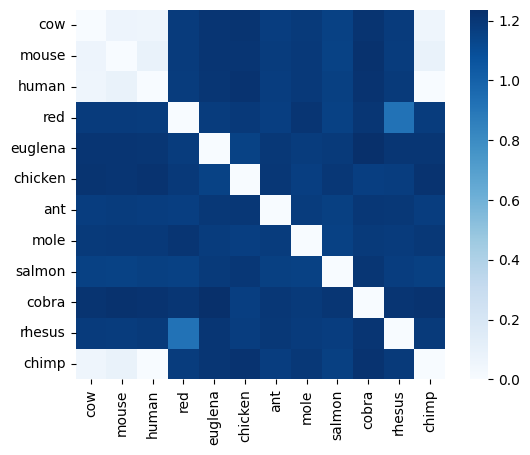

In [21]:
D    = spatial.distance.squareform(DistMa)
D    = spatial.distance.squareform(D)
D_df = pd.DataFrame(D, columns = DistMa.names)

sns.heatmap(D_df, square = True,  cmap = "Blues", \
            yticklabels = DistMa.names)
plt.show()

<br>

**3) Constructing the Tree**<br>
<br>

We are now ready to construct and plot the tree.

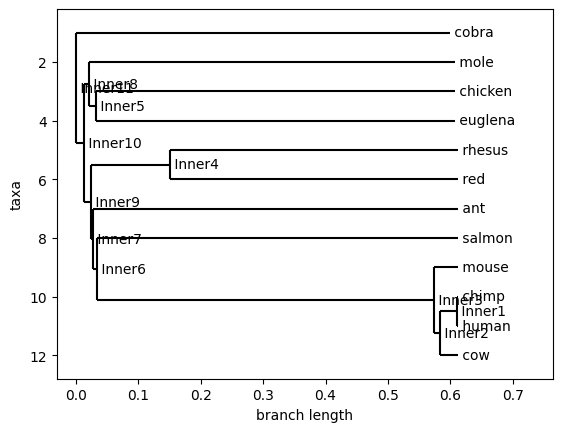

In [23]:
constructor = DistanceTreeConstructor()
UPGMATree   = constructor.upgma(DistMa)
Phylo.draw(UPGMATree)

We note that the tree makes sense for most species, but not all. There are many reasons, why the tree is not perfect:<br>
- If we use AAs instead of NTs, then we run into the problem that mapping from AAs to NTs is not unique (see **codons**) and so is the tree.<br>
- The sequences are not complete. There are gaps and the fragments might have originated from different parts of the complete sequence.<br>
- We look at only one gene or protein sequence. That is only a tiny speck of information that makes a species.<br>

Another problem is that the species are evolutionarily very distant. One can partly account for that by applying the **Neighbour - Joining (NJ)** correction. Often, it is called NJ - distance, but the result is mathematically not a distance at al.  

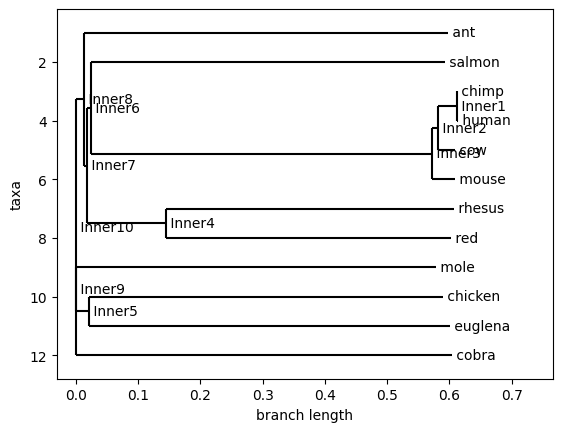

In [25]:
NJTree      = constructor.nj(DistMa) #Neighbour - Joining correction
Phylo.draw(NJTree)

In our case it might not really work, for the reasons mentioned before.<br>
<br>
Note, that some heatmap tools have a limited capability to cluster sample.

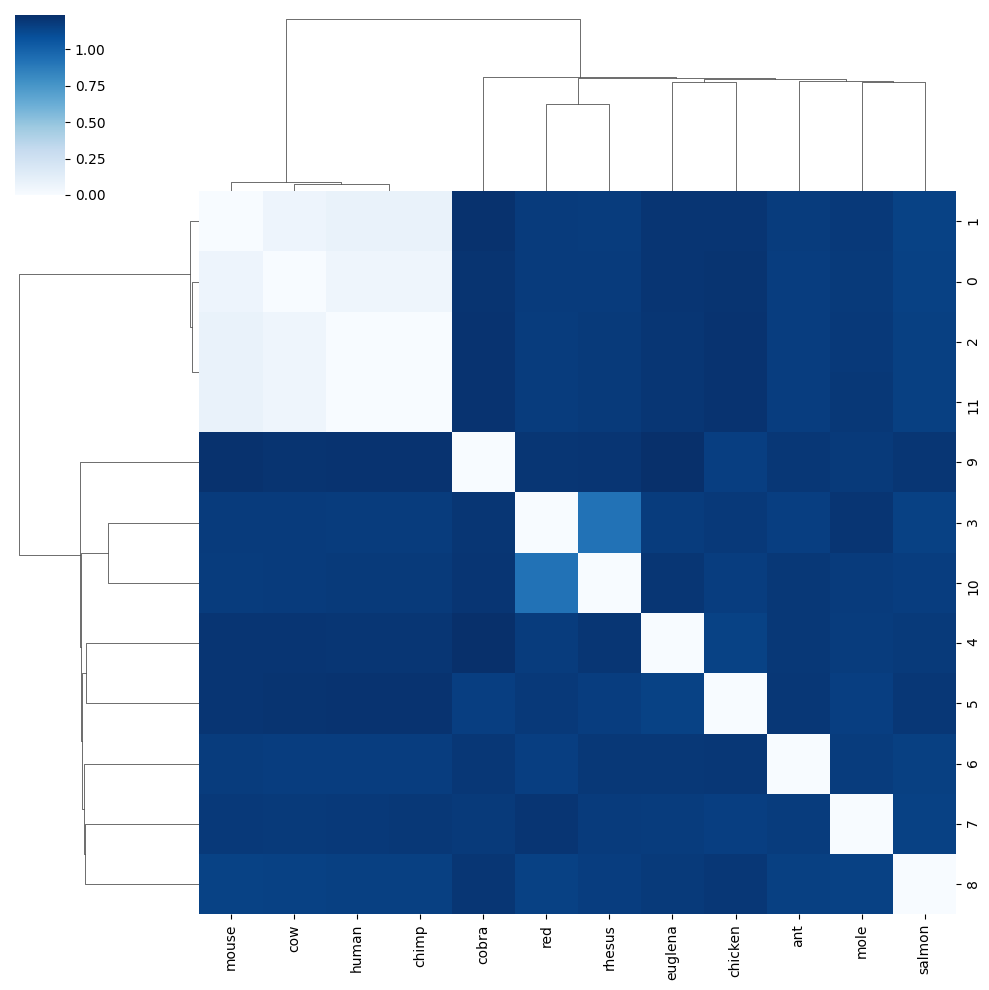

In [27]:
sns.clustermap(D_df, cmap = "Blues", row_cluster = True, col_cluster = True,\
               metric = 'euclidean', method = 'average', yticklabels = True,\
               xticklabels = True)
plt.show()

The cluster method *average* equals UPGMA. There are other methods like 

In [ ]:
#("Single Linkage", single),
#("Average Linkage", average), --> like UPGMA
#("Complete Linkage", complete),
#("Ward Linkage", ward)

available.

However, we usually can't employ a score matrix for calculating the distance in a proper way.